### Input 소개
기존 GCN 모델에서 사용한 데이터는 2가지로 다음과 같다.  
![화면 캡처 2021-05-28 213248](https://user-images.githubusercontent.com/69336270/119984405-509c0c80-bffc-11eb-9acd-cac3b9772de5.png)

In [4]:
import pickle
import numpy as np #numpy library
np.set_printoptions(threshold=np.inf, linewidth=np.inf) #inf = infinity 

# load
with open('C:/Users/tldus/Desktop/투빅스/21_1 컨퍼런스/coco_adj.pkl', 'rb') as f:
    data = pickle.load(f)
data

{'nums': array([ 2243,  1171,  3924,  1618,  1804,  1884,   668,  2539,  3844,  2287,  2241,  2098,  3734,  5968,  5028,  1340,  2791,  2080,  8606,  1186,  2818,  3322,  8950,  3159,  3170,  1389,  6518,  8378,  3041,  1062,  1518,  1205,  2537,  1511,  1798,   128,  4861,  2068,   821,  1471,  1625,  3097,  2475,  1089,  2442,  1290,  1216,  2003,   481, 45174,  2202,  3084,  1671,  2180,  1645,   673,  1105,  3291,  2511,  2209,  1170,  2493,  2986,  1214,  1631,  2343,  1510,  2368,  2667,   151,  2317,   700,  2893,  2464,  4321,  3191,  2749,  2530,  1771,  1324], dtype=int64),
 'adj': array([[   0,    0,   46,    0,    2,    2,    0,    1,   20,   15,   13,   63,    2,    7,    3,    0,   52,    5,  272,    0,    3,    4,   34,    8,    0,    1,    5,    7,    5,    0,    1,    5,    0,    2,    1,    1,   63,    3,    0,    2,   10,    3,    0,    0,   10,    0,    0,    1,    0,  781,    1,    5,    1,    2,    0,    0,    1,    1,    0,    2,    0,    0,    1,    5,   54,    

In [7]:
data['nums'].shape

(80,)

In [8]:
data['nums']

array([ 2243,  1171,  3924,  1618,  1804,  1884,   668,  2539,  3844,  2287,  2241,  2098,  3734,  5968,  5028,  1340,  2791,  2080,  8606,  1186,  2818,  3322,  8950,  3159,  3170,  1389,  6518,  8378,  3041,  1062,  1518,  1205,  2537,  1511,  1798,   128,  4861,  2068,   821,  1471,  1625,  3097,  2475,  1089,  2442,  1290,  1216,  2003,   481, 45174,  2202,  3084,  1671,  2180,  1645,   673,  1105,  3291,  2511,  2209,  1170,  2493,  2986,  1214,  1631,  2343,  1510,  2368,  2667,   151,  2317,   700,  2893,  2464,  4321,  3191,  2749,  2530,  1771,  1324], dtype=int64)

In [9]:
data['adj'].shape

(80, 80)

In [10]:
data['adj']

array([[   0,    0,   46,    0,    2,    2,    0,    1,   20,   15,   13,   63,    2,    7,    3,    0,   52,    5,  272,    0,    3,    4,   34,    8,    0,    1,    5,    7,    5,    0,    1,    5,    0,    2,    1,    1,   63,    3,    0,    2,   10,    3,    0,    0,   10,    0,    0,    1,    0,  781,    1,    5,    1,    2,    0,    0,    1,    1,    0,    2,    0,    0,    1,    5,   54,    3,    2,    2,   38,    0,    0,    0,   17,    3,  467,    5,    6,    0,    0,    0],
       [   0,    0,   20,  380,    1,    1,    1,   11,   13,   11,   39,   16,   56,  185,  385,   80,    5,   40,   22,  103,   23,   16,  154,   39,   44,    4,  165,  324,   18,   11,    5,    1,   71,    0,    0,    0,   60,    2,    2,   11,    2,  145,   28,   39,    8,   10,  476,   73,    0,  378,    7,   64,   79,    6,   49,    6,    1,   70,    0,    0,    0,  106,    2,    0,    3,    0,    8,    0,   10,   11,    1,    1,    1,    2,   17,   32,   18,   49,   45,    0],
       [  46,   20,   

80개의 label에 대해 각 label이 coco dataset에서 등장 횟수 카운팅 = nums >> 80 X 1  
80개의 label에 대해 coco dataset에서 동시발생횟수를 카운팅한 행렬 = adj >> 80 X 80  

예를 들어 adj 행렬에서 1번째 row는 1번째 label에 대해 다른 label이 함께 등장한 횟수를 카운팅한 것이다. 그러므로, data['adj'].iloc[0,2] = 46인데, data['adj'].iloc[2, 0] = 46임을 확인할 수 있다.

또한, 그래프에서 가중치로 사용될 label별 상관계수 역시 동시발생횟수를 기반으로 한 조건부 확률이라고 볼 수 있다. 다만, label별 조건부확률의 크기가 매우 상이할 것으로 예상되므로 임계치 이상의 경우 일정한 값을 부여할 것으로 예상된다.

In [11]:
# load
with open('C:/Users/tldus/Desktop/투빅스/21_1 컨퍼런스/coco_glove_word2vec.pkl', 'rb') as f:
    data1 = pickle.load(f)
data1

array([[ 4.82490003e-01,  1.09470002e-01, -3.80120009e-01, -7.62369990e-01, -4.05000001e-01,  2.03559995e-01, -6.04070015e-02,  1.79680005e-01, -9.61019993e-02, -1.04279995e+00, -1.07009999e-01,  2.79110000e-02,  3.48740011e-01, -6.92990005e-01,  1.28600001e-01,  2.14579999e-01,  7.15979993e-01,  1.42320007e-01, -1.78680003e-01, -3.63260001e-01,  2.71019995e-01,  8.07120025e-01,  3.62489998e-01,  2.74729997e-01, -1.99039996e-01,  2.63429999e-01, -6.46699965e-02, -4.74469990e-01, -3.89770001e-01, -3.73270005e-01, -1.94150001e-01, -1.16920002e-01, -1.41470000e-01, -3.33810002e-01, -2.60659996e-02,  2.48940006e-01, -7.16210008e-01, -5.31069994e-01,  3.56239988e-03,  4.33459997e-01, -6.17600024e-01,  2.89949998e-02,  1.26029998e-01,  1.39970005e-01, -2.13320002e-01,  6.99249981e-03,  8.38379979e-01, -2.94160008e-01,  2.93870002e-01, -9.82619971e-02,  5.15439987e-01, -4.84160006e-01, -1.07300002e-02,  3.60810012e-01, -8.66980016e-01, -1.02849998e-01,  3.43360007e-02, -2.66050011e-01,  1.699

GloVe를 활용한 label의 워드임베딩 벡터
***
### Cafe_dictinfo Label

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

In [13]:
data = pd.read_csv('C:/Users/tldus/Desktop/투빅스/21_1 컨퍼런스/cafe_dictinfo.csv')
data

,locate,taste_score,price_score,service_score,feat_text,purpose_list,name_list,main_tag_list,score_list,star_score,like
0,서울특별시 강동구 둔촌2동 53-3,5.0,2.9,5.0,"빈티지, 무료주차",방문목적\n혼카페(2) 차모임(1) 데이트(1) 간식(1) 기념일(1)\n…더보기,NaN,NaN,NaN,NaN,NaN
1,서울특별시 강동구 둔촌동 213-1,0.0,0.0,0.0,"디너코스, 주차",-,드 까르멜릿,NaN,NaN,NaN,NaN
2,서울시 강동구 둔촌동 53번지 원경빌딩 1F,3.0,5.0,5.0,"저렴, 주차, 배달",방문목적\n차모임(1) 혼카페(1),전광수 커피하우스 천호동점,데이트장소,NaN,NaN,NaN
3,서울특별시 강동구 둔촌동 603-4,-,-,-,NaN,-,카페 원앤온리,NaN,-,NaN,NaN
4,서울특별시 강동구 둔촌동 490-17,5.0,3.0,5.0,"빈티지, 배달",방문목적\n혼카페(1) 차모임(1),외계인커피,데이트,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3604,강원도 춘천시 효자동 542-2,3.0,3.0,3.0,예쁜,방문목적\n데이트(1) 차모임(1),마릴본,데이트,-,3.0점,2
3605,강원도 춘천시 효자동 640-6,-,-,-,"정갈한, 아침식사, 점심식사, 저녁식사",-,박명선뽕잎김밥앤카페,혼밥,-,3.0점,1
3606,강원도 춘천시 효자동 149-66,1.0,1.0,5.0,가정집,방문목적\n혼밥(1) 기념일(1) 차모임(1) 데이트(1),효자동 프로젝트,데이트,-,3.0점,1
3607,강원도 춘천시 효자동 694 1층,-,-,-,"지역화폐, 주차",-,데일리베이크샵,NaN,-,3.0점,0


In [31]:
feat = pd.DataFrame(data['feat_text'])
feat1 = feat[feat['feat_text'].notnull()]
feat1.reset_index(inplace=True)
feat1

,index,feat_text
0,0,"빈티지, 무료주차"
1,1,"디너코스, 주차"
2,2,"저렴, 주차, 배달"
3,4,"빈티지, 배달"
4,5,담백한맛
...,...,...
3324,3604,예쁜
3325,3605,"정갈한, 아침식사, 점심식사, 저녁식사"
3326,3606,가정집
3327,3607,"지역화폐, 주차"


In [32]:
li=[]
for i in range(len(feat1)):
        sp = feat1['feat_text'][i].split(',')
        for j in range(len(sp)):
            li.append(sp[j])

In [33]:
len(li)

6864

feat_text에서 등장한 모든 label의 수 = 6864

In [34]:
li3 = pd.DataFrame(li)
feat_cnt = pd.DataFrame(li3[0].value_counts())
feat_cnt.reset_index(inplace=True)
feat_cnt.columns=['label', 'count']
feat_cnt

,label,count
0,주차,756
1,예쁜,750
2,배달,603
3,점심식사,520
4,애완동물동반,395
...,...,...
161,쾌적한분위기,1
162,일본느낌,1
163,고급레스토랑,1
164,캔포장,1


#### Label별 카운팅

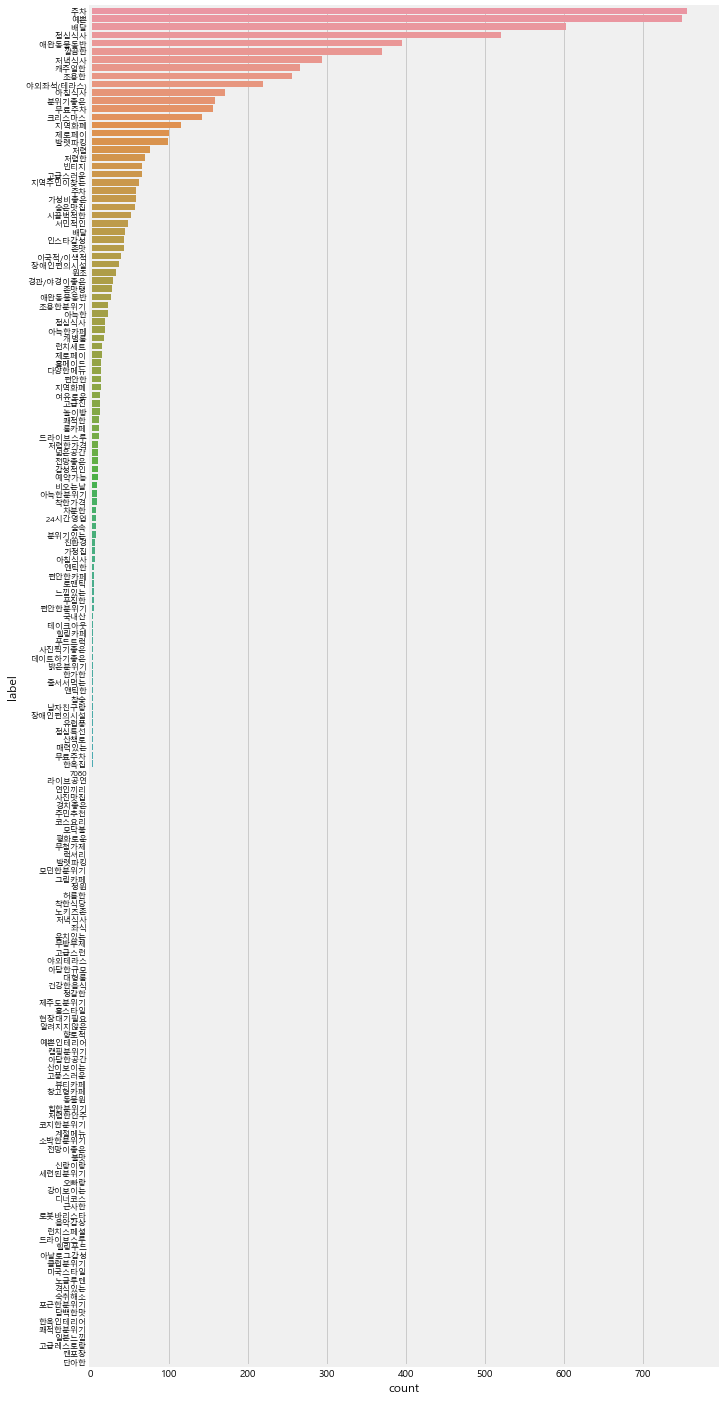

In [38]:
plt.figure()
plt.rcParams['figure.figsize'] = [10, 25] # [width, height]
plt.rc('font', family='Malgun Gothic')

sns.barplot(x='count', y='label', data=feat_cnt)

plt.yticks(fontsize=8)
plt.show()
# plt.savefig('feat_count1.png')

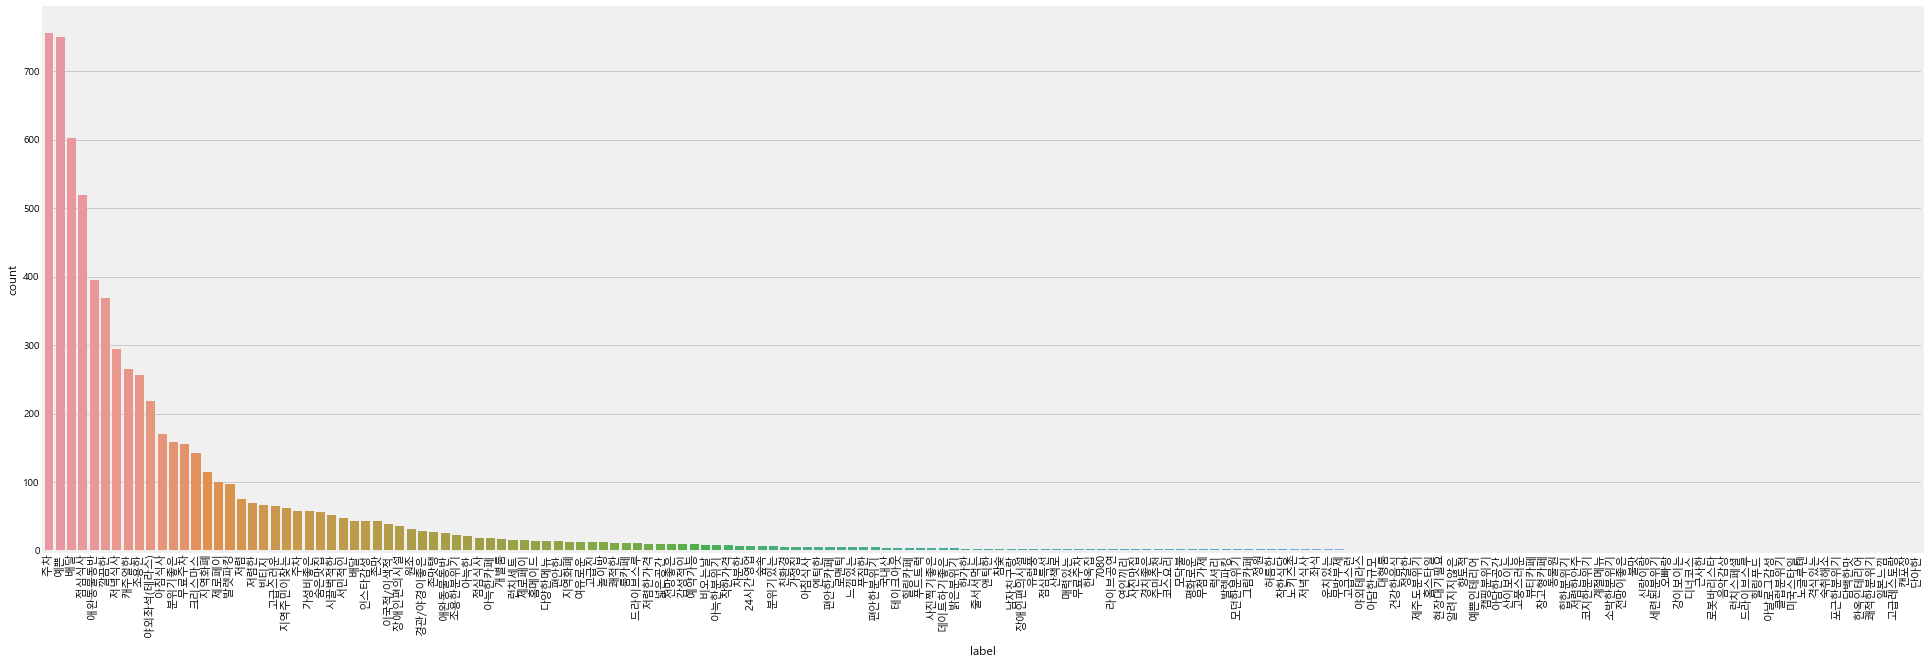

In [40]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10] # [width, height]
plt.rc('font', family='Malgun Gothic')

sns.barplot(x='label', y='count', data=feat_cnt)

plt.xticks(rotation=90, fontsize=11)
plt.show()
# plt.savefig('feat_count2.png')

In [41]:
li1 = set(li)
li2 = list(li1)
len(li2)

166

중복 제외 시 등장한 label의 수 = 166  
해당 label을 기반으로 동시등장행렬 생성

In [42]:
cooccur = pd.DataFrame(index=range(0,3609), columns=li2)
cooccur= cooccur.fillna(0)

for i in range(len(feat1)):
        sp = feat1['feat_text'][i].split(',')
        for j in range(len(sp)):
            for k in range(len(li2)):
                if li2[k] == sp[j]:
                    cooccur.iloc[i,k] = 1
cooccur

,가성비좋은,아침식사,숲속,무첨가제,단아한,숙취해소,포근한분위기,푸드트럭,편안한카페,한가한,...,그림카페,줄서서먹는,모던한분위기,저렴한안주,발렛파킹,클럽분위기,예약가능,노글루텐,엔틱한,크리스마스
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


각 카페별 feat_text 등장행렬 (해당 label 등장 시 1, 없으면 0)

In [43]:
label = pd.DataFrame(index=range(0,166), columns=li2)
label= label.fillna(0)


for i in range(len(li2)):
    tt = cooccur[cooccur.iloc[:,i]==1]
    aa = pd.DataFrame(tt.sum())
    aa.reset_index(inplace=True)
    aa.columns=['label','count']
    
    for j in range(len(aa)):
        label.iloc[i,j] += aa['count'][j]
label

,가성비좋은,아침식사,숲속,무첨가제,단아한,숙취해소,포근한분위기,푸드트럭,편안한카페,한가한,...,그림카페,줄서서먹는,모던한분위기,저렴한안주,발렛파킹,클럽분위기,예약가능,노글루텐,엔틱한,크리스마스
0,58,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,171,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
2,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
162,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,10,0,0,2
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


label X label로 각 label별 동시등장횟수 카운팅